In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [7]:
# Load the dataset
# This dataset contains information about suicide rates, population, age groups, and other related attributes.
data_path = 'Data3.csv'
df = pd.read_csv(data_path)

In [8]:
# Initial Inspection
print("Initial Dataset Information:")
df.info()
print("\nSample of the dataset:")
print(df.head())


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB

Sample of the dataset:
   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0


In [9]:
# Data Cleaning
print("\nHandling missing values...")
# Fill missing 'suicides_no' with 0 to ensure calculations are not affected by missing data.
df['suicides_no'] = df['suicides_no'].fillna(0)
# Fill missing 'population' with the median as it is less sensitive to outliers than the mean.
df['population'] = df['population'].fillna(df['population'].median())


Handling missing values...


In [10]:
# Feature Engineering
print("\nCreating suicide_rate feature...")
# Calculate the suicide rate per 100,000 individuals for standardized comparison across populations.
df['suicide_rate'] = (df['suicides_no'] / df['population']) * 100000  # Normalizing suicide numbers per 100,000 individuals makes the data comparable across populations.




Creating suicide_rate feature...


In [11]:
# Handling categorical variables
print("\nEncoding categorical variables...")
# Encode categorical variables to numerical values for machine learning models.
categorical_columns = ['sex', 'age', 'country']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



Encoding categorical variables...



Visualizing data...


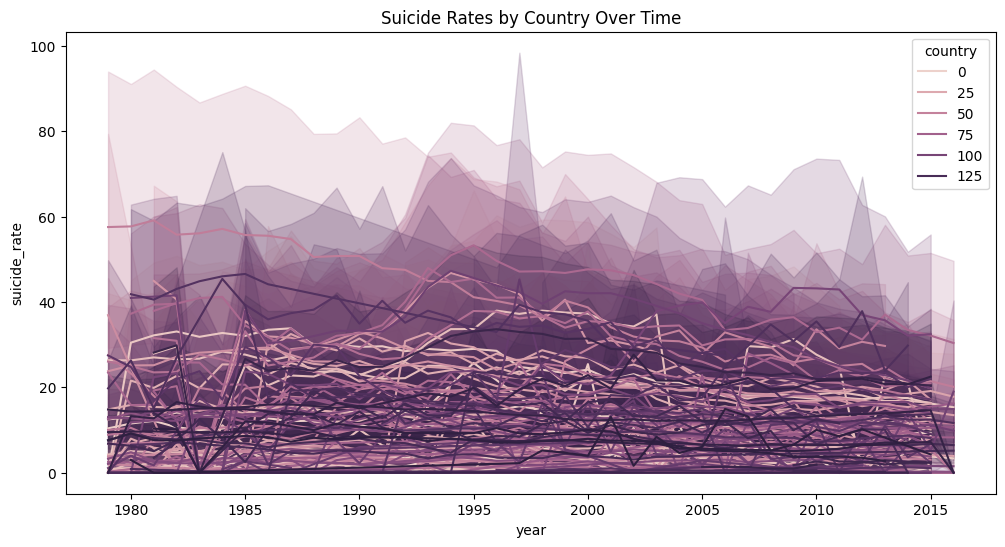

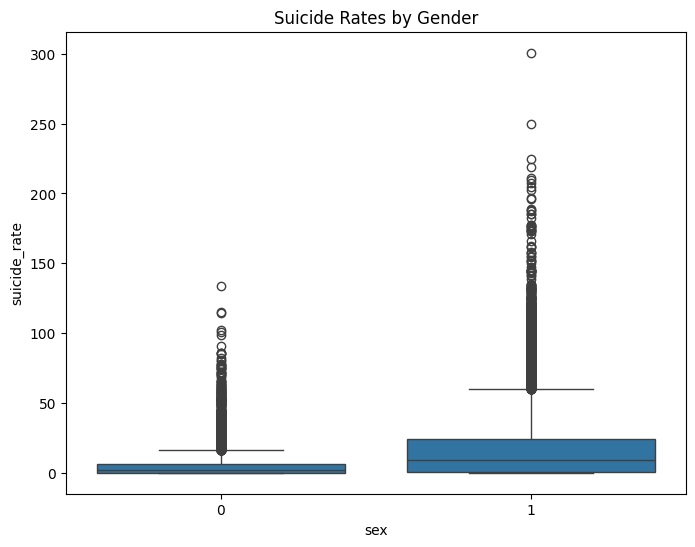

In [12]:
# Data Visualization
print("\nVisualizing data...")
plt.figure(figsize=(12, 6))
# Line plot to observe trends in suicide rates by country over time.
sns.lineplot(data=df, x='year', y='suicide_rate', hue='country')
plt.title("Suicide Rates by Country Over Time")
plt.show()

plt.figure(figsize=(8, 6))
# Box plot to compare suicide rates across genders.
sns.boxplot(data=df, x='sex', y='suicide_rate')
plt.title("Suicide Rates by Gender")
plt.show()

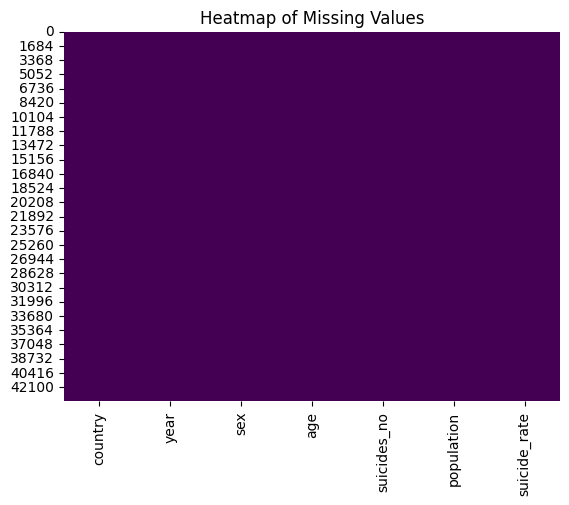

In [13]:
# Heatmap to visualize missing data in the dataset.
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

In [23]:
# Feature Scaling
print("\nScaling numerical features...")
# Standardize population to improve model performance and convergence.
scaler = StandardScaler()
df[['population']] = scaler.fit_transform(df[['population']])


Scaling numerical features...


In [24]:
# Splitting Data for Regression
print("\nPreparing data for regression...")
# Define features and target variable for the regression model.
X = df[['year', 'population', 'sex', 'age','country']]
y = df['suicide_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Preparing data for regression...


In [25]:

# Model Training and Evaluation
print("\nTraining RandomForestRegressor...")
# Train a Random Forest Regressor for predicting suicide rates.
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)


Training RandomForestRegressor...


RandomForestRegressor(random_state=42)

In [26]:

# Evaluate model performance.
predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 47.73493584855611
R-Squared: 0.8605733444352937


In [27]:

# Feature Importance
# Display the importance of each feature in predicting suicide rates.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': regressor.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
      Feature  Importance
4     country    0.337979
1  population    0.300750
3         age    0.150853
2         sex    0.108746
0        year    0.101671



Performing clustering analysis...


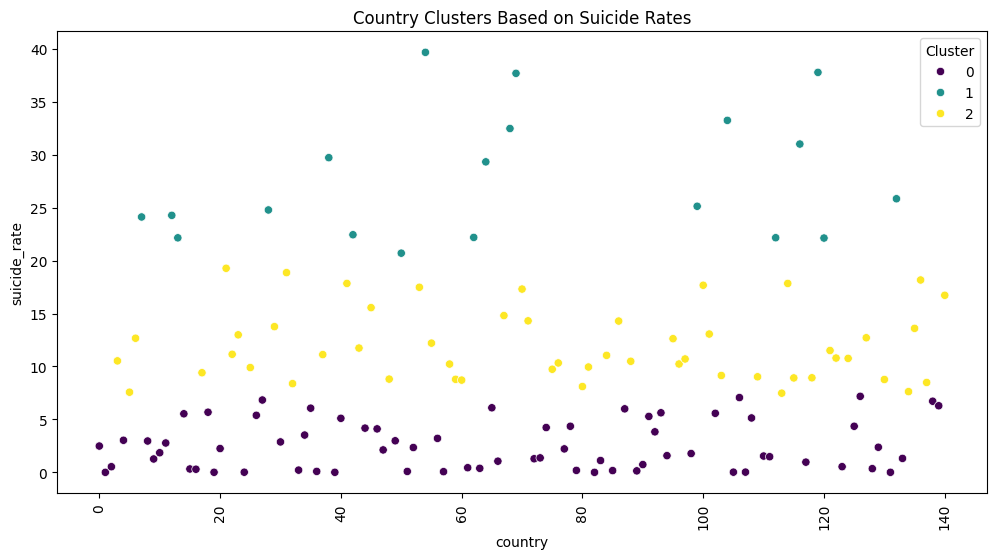

In [28]:
# Clustering Analysis
print("\nPerforming clustering analysis...")
# Group by country and calculate the mean suicide rate for clustering analysis.
clustering_data = df.groupby('country')['suicide_rate'].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data[['suicide_rate']])

plt.figure(figsize=(12, 6))
# Scatter plot to visualize country clusters based on suicide rates.
sns.scatterplot(data=clustering_data, x='country', y='suicide_rate', hue='Cluster', palette='viridis')
plt.title("Country Clusters Based on Suicide Rates")
plt.xticks(rotation=90)
plt.show()


In [44]:


print("\nPredicting future suicide rates...")

# Encode the 'country' feature (example assumes one-hot encoding or similar was used during training)
# Use the same encoding method as during training
encoded_countries = pd.DataFrame({'country': [10] * 6})  # Example for Albania
# If you have multiple countries, adjust the encoding dynamically based on the training process.

# Create the future years DataFrame
future_years = pd.DataFrame({
    'year': range(2029, 2035),
    'population': [df['population'].mean()] * 6,
    'sex': [0] * 6,  # Assuming 0 represents a specific gender
    'age': [25] * 6   # Assuming 0 represents a specific age group
})

# Combine future_years with encoded country features
future_years = pd.concat([future_years, encoded_countries], axis=1)


# Predict future suicide rates
future_predictions = regressor.predict(future_years)
future_years['predicted_suicide_rate'] = future_predictions

print("\nFuture Predictions:")
print(future_years)



Predicting future suicide rates...

Future Predictions:
   year    population  sex  age  country  predicted_suicide_rate
0  2029  2.077610e-17    0   25       11                3.656827
1  2030  2.077610e-17    0   25       11                3.656827
2  2031  2.077610e-17    0   25       11                3.656827
3  2032  2.077610e-17    0   25       11                3.656827
4  2033  2.077610e-17    0   25       11                3.656827
5  2034  2.077610e-17    0   25       11                3.656827


In [45]:
# Saving Cleaned Data
print("\nSaving cleaned dataset...")
# Save the cleaned and processed dataset for further analysis.
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved as 'cleaned_data.csv'.")


Saving cleaned dataset...
Cleaned data saved as 'cleaned_data.csv'.


In [54]:
def predict_suicide_likelihood(year, population, sex, age, country):
    """
    Predict the likelihood of suicide for a given individual.
    """
    # Validate if input values exist in the encoders' classes.
    if sex not in label_encoders['sex'].classes_ or age not in label_encoders['age'].classes_ or country not in label_encoders['country'].classes_:
        raise ValueError("Provided sex, age, or country value is invalid.")

    # Encode categorical values using pre-fitted label encoders.
    encoded_sex = label_encoders['sex'].transform([sex])[0]
    encoded_age = label_encoders['age'].transform([age])[0]
    encoded_country = label_encoders['country'].transform([country])[0]

    # Standardize population input using a DataFrame to include feature names.
    population_df = pd.DataFrame({'population': [population]})
    standardized_population = scaler.transform(population_df)[0][0]

    # Create a DataFrame for prediction.
    input_data = pd.DataFrame({
        'year': [year],
        'population': [standardized_population],
        'sex': [encoded_sex],
        'age': [encoded_age],
        'country': [encoded_country]
    })

    # Match column names with those used during training.
    expected_columns = ['year', 'population', 'sex', 'age', 'country']
    input_data = input_data[expected_columns]

    # Predict suicide rate using the trained model.
    predicted_rate = regressor.predict(input_data)[0]
    return predicted_rate

# Example usage
likelihood = predict_suicide_likelihood(2022, 1000000, 'male', '25-34 years', 'Albania')
print(likelihood)


# Convert likelihood to a percentage (if the model predicts probabilities)
if 0 <= likelihood <= 1:  # Check if the value is in probability range
    likelihood_percentage = likelihood * 100
    print(f"Likelihood: {likelihood_percentage:.2f}%")
else:
    print(f"Predicted rate per 100,000: {likelihood:.2f}")



12.320890126385278
Predicted rate per 100,000: 12.32
